In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/drive/MyDrive/DL Project/Game of deep learning.zip" -d "/content/drive/MyDrive/DL Project"

In [2]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/DL Project/Game of deep learning/train/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2851972.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2877113.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2876169.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2870115.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2856050.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2866133.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2847733.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2872151.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2860068.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2869704.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/train/images/2868764.jpg
/content/drive/MyDrive/DL Project/Game of deep learning/tr

# Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.math import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [4]:
train = pd.read_csv('/content/drive/MyDrive/DL Project/Game of deep learning/train/train.csv')

# Data Analysis

In [5]:
train.head()

image  category
0  2823080.jpg         1
1  2870024.jpg         1
2  2662125.jpg         2
3  2900420.jpg         3
4  2804883.jpg         2

In [6]:
train.tail()

image  category
6247  2881056.jpg         3
6248  1145083.jpg         2
6249  2898652.jpg         5
6250  2868175.jpg         3
6251  2784171.jpg         1

In [7]:
train.describe()

category
count  6252.000000
mean      2.657550
std       1.528998
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     6252 non-null   object
 1   category  6252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.8+ KB


In [9]:
train.shape

(6252, 2)

In [10]:
train.isnull().sum()

image       0
category    0
dtype: int64

<Axes: xlabel='category', ylabel='count'>

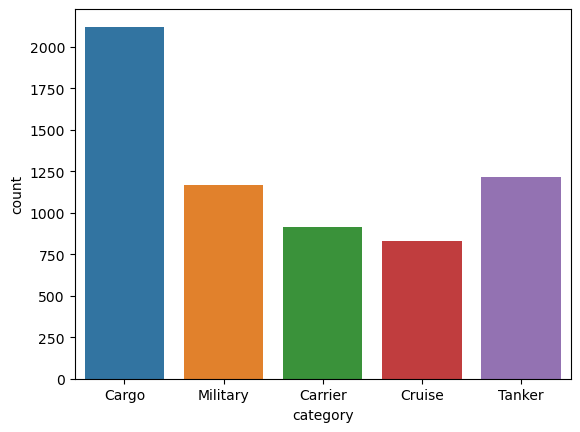

In [11]:
ship_categories = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tanker'}
sns.countplot(x=train["category"].map(ship_categories))

<Axes: ylabel='count'>

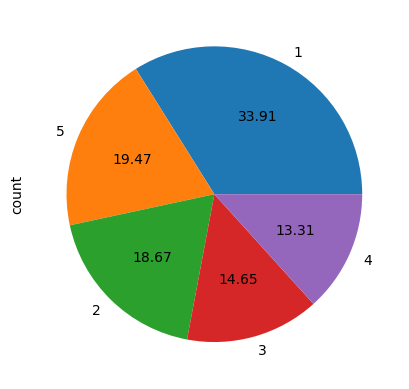

In [12]:
pie = train.loc[:, "category"].value_counts()
pie.plot.pie(autopct='%.2f')

<Axes: ylabel='count'>

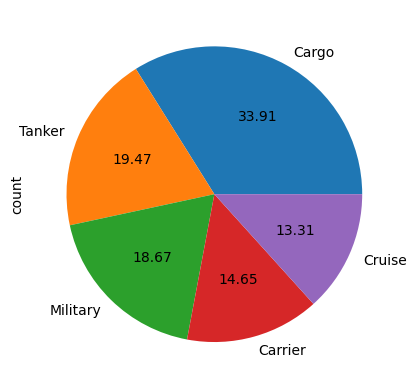

In [13]:
pie = train["category"].map(ship_categories).value_counts()
pie.plot.pie(autopct='%.2f')

# Data Preprocessing

**Function to load and preprocess an image**

In [14]:
path = '/content/drive/MyDrive/DL Project/Game of deep learning/train/images'
target_shape = (128, 128, 3)

def load_and_preprocess_image(image_path, target_shape):
    img = plt.imread(image_path)
    img = cv2.resize(img, (target_shape[1], target_shape[0]))  # Resize the image
    return img

**Load and preprocess images to an array of RGB colors**

In [15]:
refactor_size = 128
resized_image_list = []
all_paths = []

for i in range(len(train)):
    image_path = os.path.join(path, train["image"][i])
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)
    resized_image_list.append(imgarr)
    all_paths.append(image_path)

resized_image_list = np.asarray(resized_image_list) #List of preprocessed images

**Plotting first 20 Images**

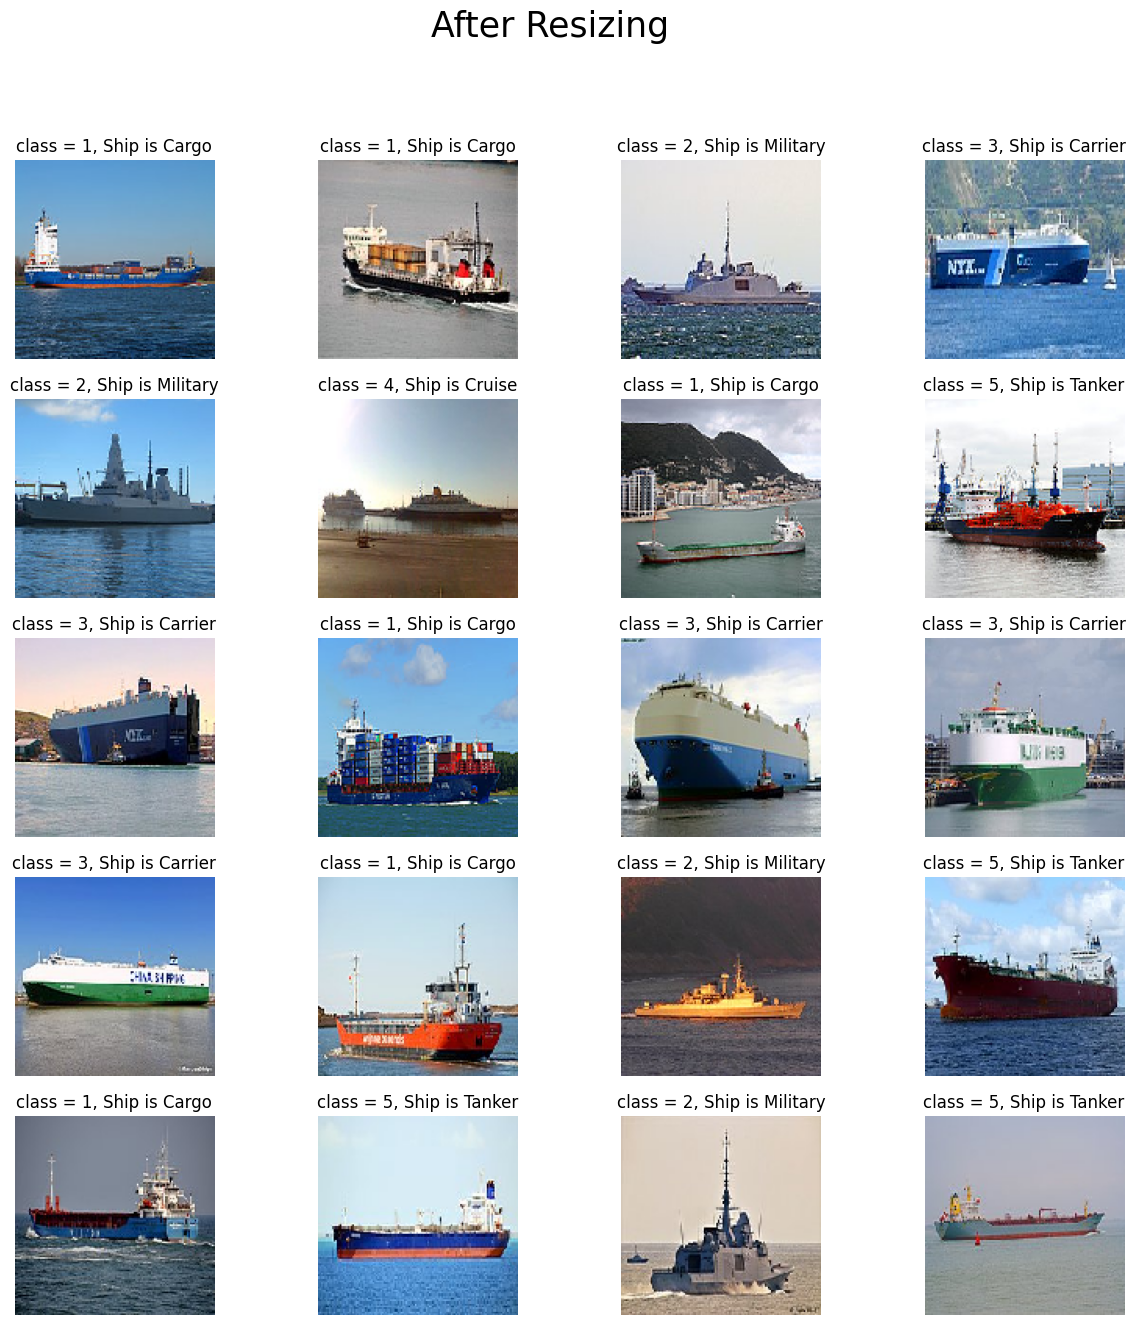

In [16]:
nrow = 5
ncol = 4
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('After Resizing', size=25)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_image_list[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [ ]:
# Saving the preprocessed images in the desired folder

# from PIL import Image
# import csv

# output_dir = r'Game of deep learning\DL\train\Preprocessed'

# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for i, img_arr in enumerate(resized_image_list):
#     img_pil = Image.fromarray(np.uint8(img_arr*255))
#     img_path = os.path.join(output_dir, f'resized_image_list_{i}.jpg')
#     img_pil.save(img_path)
#     print(f'Saved images {i} to {img_path}')

In [ ]:
# !pip install opencv-python

#### Data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2),])
augmented_images = data_augmentation(resized_image_list)

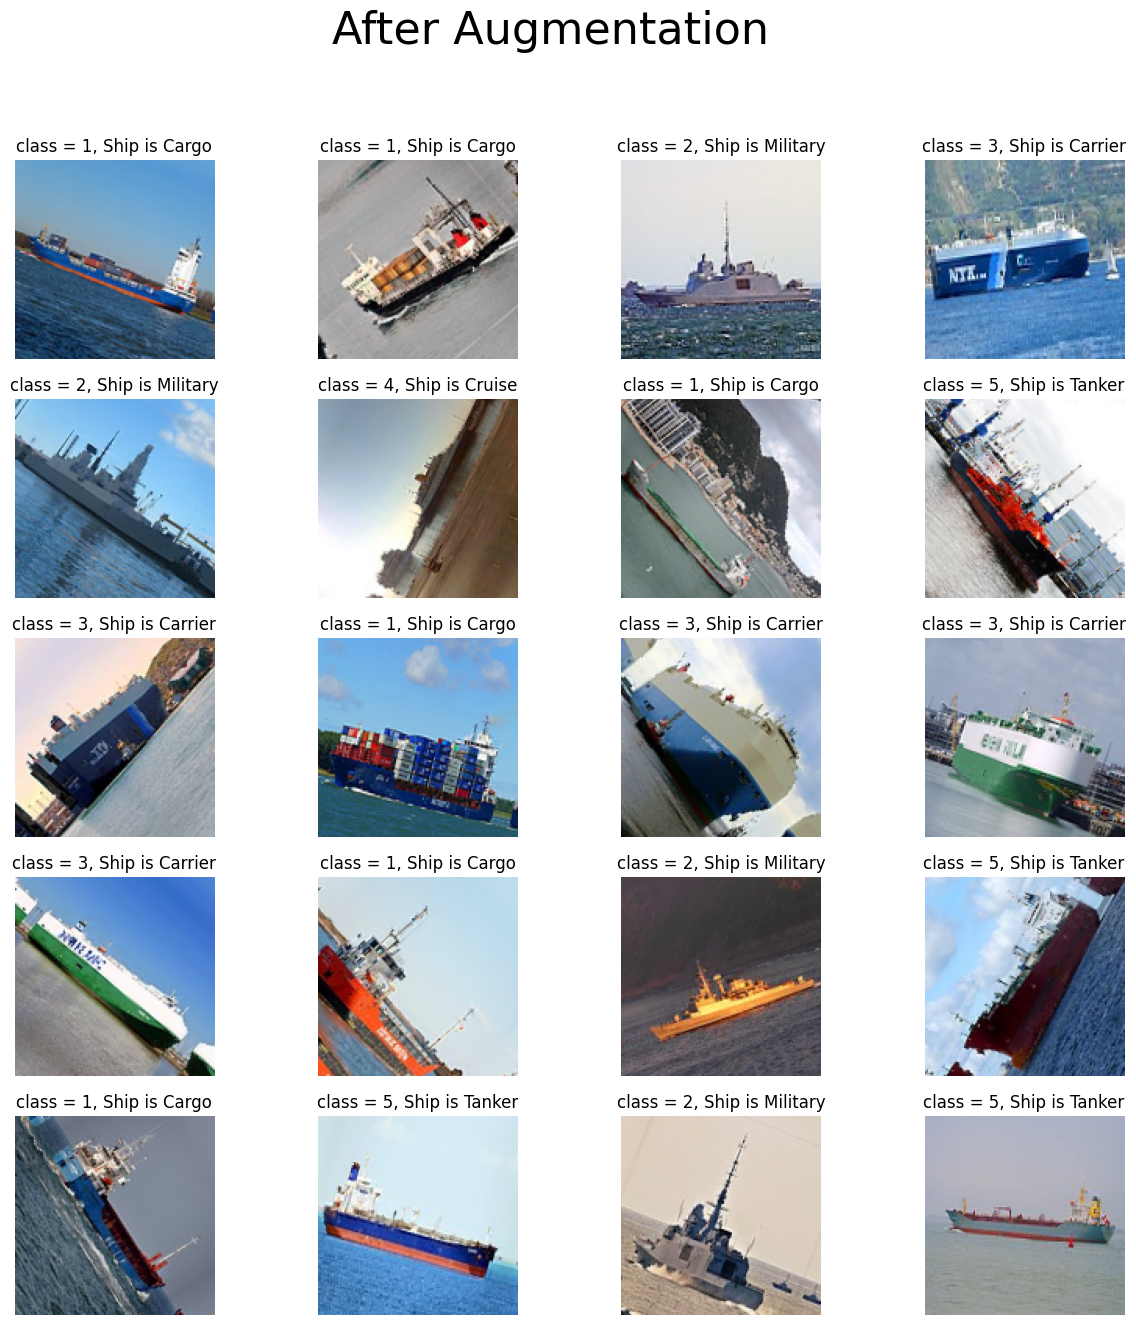

In [ ]:
fig2 = plt.figure(figsize=(15, 15))
fig2.suptitle('After Augmentation', size=32)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(augmented_images[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [ ]:
cat_values = train["category"] - 1
cat_values.value_counts()

category
0    2120
4    1217
1    1167
2     916
3     832
Name: count, dtype: int64

In [17]:
ship_categories = {0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tanker'}

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(resized_image_list, cat_values, random_state=30)
print(x_train.shape, y_train.shape)

(4689, 128, 128, 3) (4689,)


### **CNN Model**

In [ ]:
model = models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

#### Compile the model

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[checkpoint])

Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 1.4261 - accuracy: 0.3926
Epoch 1: val_accuracy improved from -inf to 0.43570, saving model to best_model.h5
147/147 [==============================] - 8s 33ms/step - loss: 1.4261 - accuracy: 0.3926 - val_loss: 1.3066 - val_accuracy: 0.4357
Epoch 2/50
144/147 [============================>.] - ETA: 0s - loss: 1.2444 - accuracy: 0.4770
Epoch 2: val_accuracy improved from 0.43570 to 0.49264, saving model to best_model.h5
147/147 [==============================] - 3s 22ms/step - loss: 1.2456 - accuracy: 0.4769 - val_loss: 1.1886 - val_accuracy: 0.4926
Epoch 3/50
145/147 [============================>.] - ETA: 0s - loss: 1.1510 - accuracy: 0.5269
Epoch 3: val_accuracy improved from 0.49264 to 0.52015, saving model to best_model.h5
147/147 [==============================] - 3s 21ms/step - loss: 1.1520 - accuracy: 0.5266 - val_loss: 1.1183 - val_accuracy: 0.5202
Epoch 4/50
145/147 [============================>.] - ETA: 0s

#### Load the best model saved during training

In [ ]:
best_model = models.load_model('best_model.h5')

In [ ]:
test_loss, best_test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print("\nBest Test Accuracy:", best_test_acc)

49/49 - 1s - loss: 0.6100 - accuracy: 0.7895 - 550ms/epoch - 11ms/step

Best Test Accuracy: 0.7895073294639587


#### Predictions using the best accuracy

In [ ]:
best_predictions = best_model.predict(x_test)
best_predicted_classes = np.argmax(best_predictions, axis=1)

49/49 [==============================] - 1s 8ms/step


### Confusion matrix

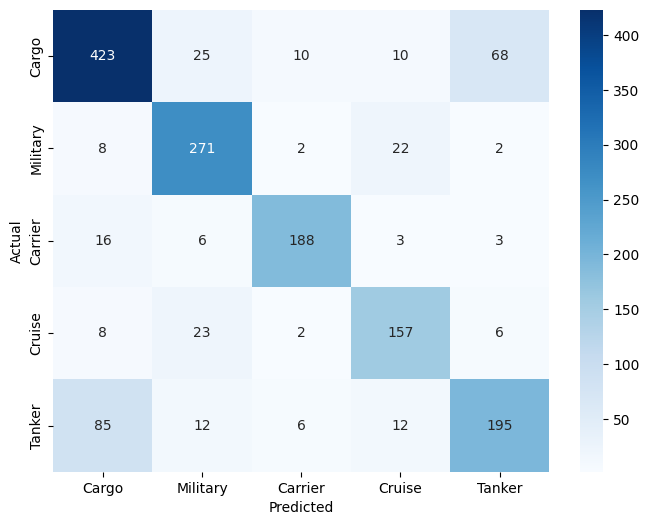

In [ ]:
best_cm = confusion_matrix(y_test, best_predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='g', cmap='Blues', xticklabels=ship_categories.values(), yticklabels=ship_categories.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Plotting first 20 predictions

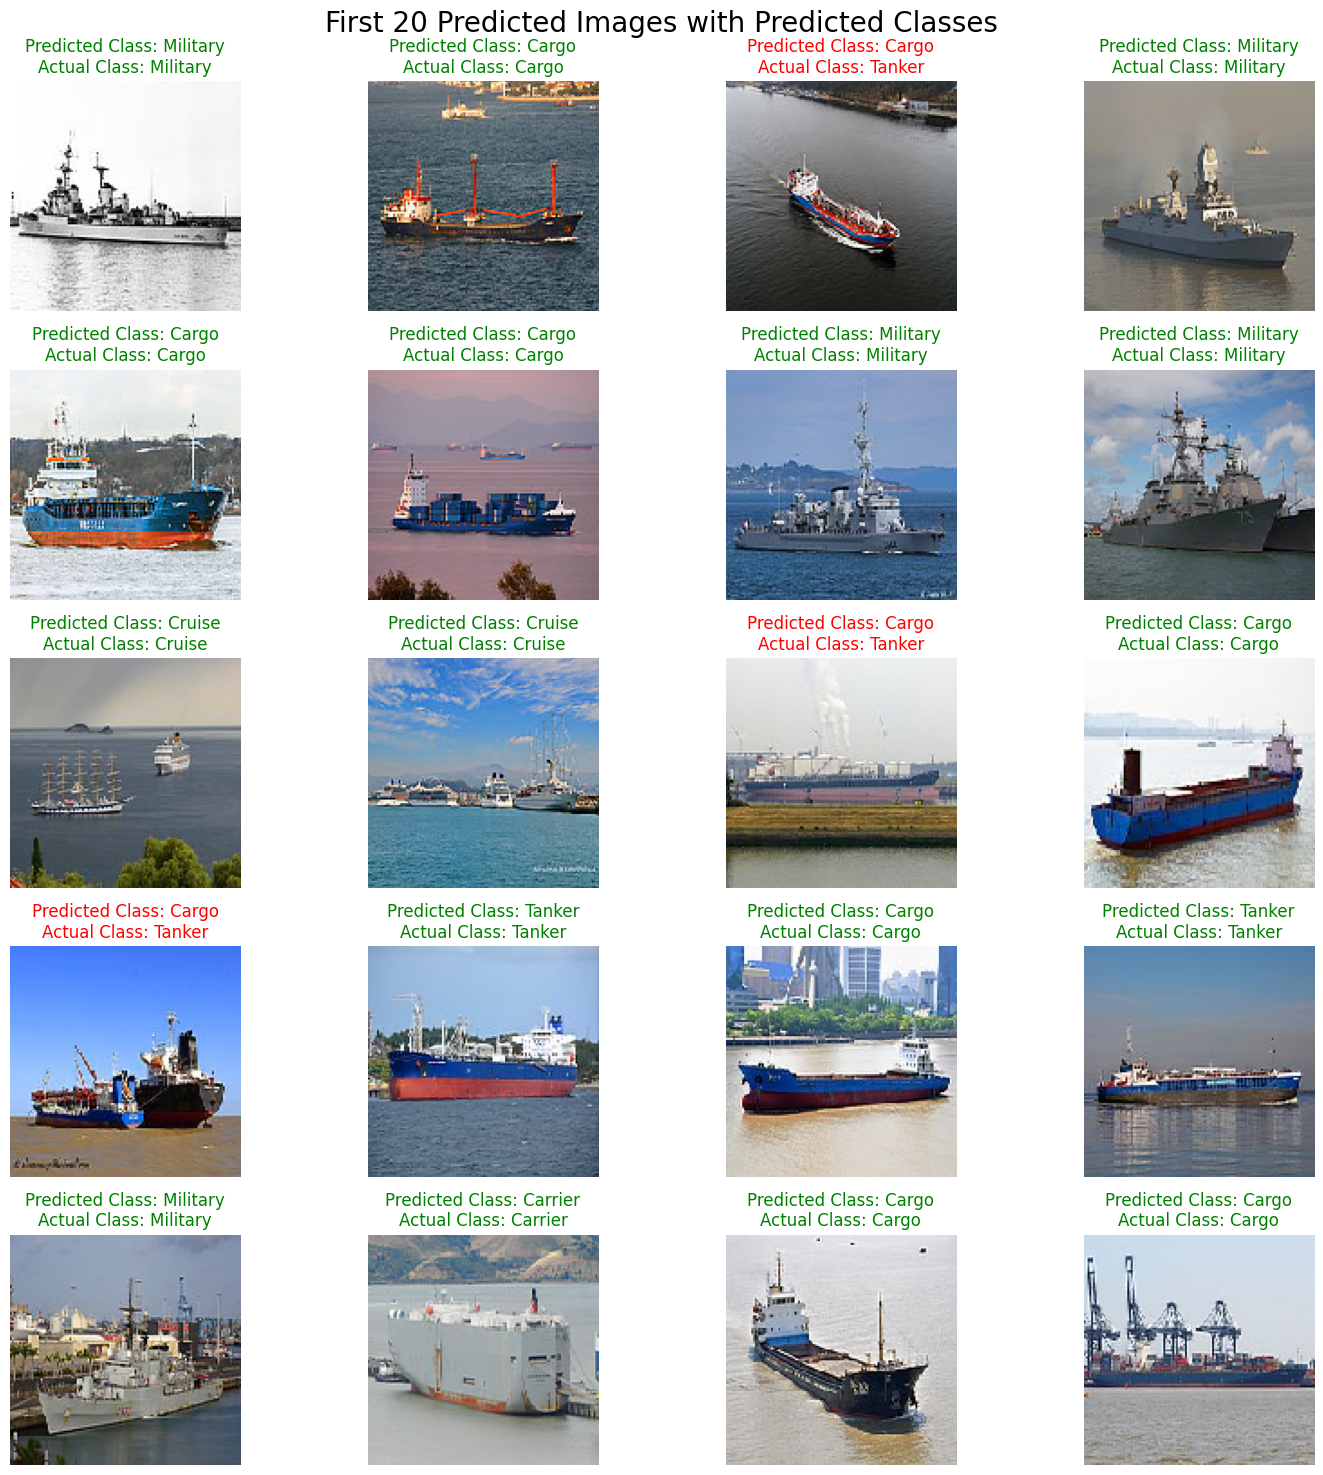

In [ ]:
y_test = y_test.reset_index(drop=True)
plt.figure(figsize=(15, 15))
plt.suptitle('First 20 Predicted Images with Predicted Classes', size=20)
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[i])
    predicted_class_label = ship_categories[best_predicted_classes[i]]
    actual_class_label = ship_categories[y_test[i]]

    if best_predicted_classes[i] == y_test[i]:
        title_color = 'green'
    else:
        title_color = 'red'

    title = f'Predicted Class: {predicted_class_label}\nActual Class: {actual_class_label}'
    plt.title(title, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

### **ResNet50 Model**

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from PIL import Image
from tqdm import tqdm

In [19]:
image_path = "/content/drive/MyDrive/DL Project/Game of deep learning/train/images/"
shape = (64, 64, 1)
batch_size1 = 24

In [20]:
train_images = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(image_path + train['image'][i], target_size=shape, grayscale=True)
    img = image.img_to_array(img)
    img = img.astype(np.float32) / 255.0
    train_images.append(img)
X1 = np.array(train_images)

100%|██████████| 6252/6252 [00:21<00:00, 291.28it/s]


In [21]:
y_val1 = train['category'].subtract(1).values
y1 = to_categorical(y_val1, num_classes=len(ship_categories))

Validating the images

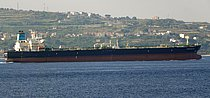

In [22]:
Image.open(image_path + train['image'][3254])

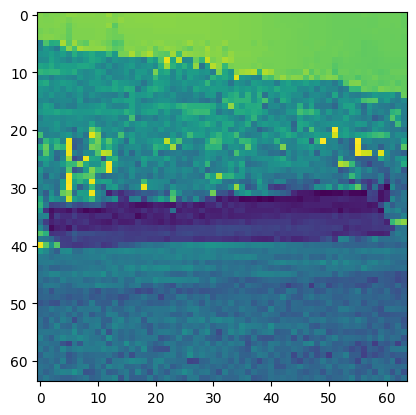

In [24]:
plt.imshow(X1[3254])
plt.show()

In [25]:
resnet_model = ResNet50(include_top=False, weights=None, input_shape=shape)
layer = resnet_model.output
layer = Flatten()(layer)
layer = Dense(512, activation='tanh')(layer)
# layer = Dropout(0.3)(layer)
layer = Dense(128, activation='tanh')(layer)
# layer = Dropout(0.3)(layer)
layer = Dense(len(ship_categories), activation='softmax')(layer)
model1 = Model(inputs = resnet_model.input, outputs = layer)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 1)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           3200      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [26]:
for layer in resnet_model.layers:
    layer.trainable = False

In [27]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((4689, 64, 64, 1), (1563, 64, 64, 1), (4689, 5), (1563, 5))

In [31]:
aug_img = dict(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
datagen = image.ImageDataGenerator(**aug_img)

In [32]:
train_dataset1 = datagen.flow(X_train1, y_train1, batch_size=batch_size1)
test_dataset1 = datagen.flow(X_test1, y_test1, batch_size=batch_size1)

In [33]:
step_size_train = train_dataset1.n//train_dataset1.batch_size
step_size_val = test_dataset1.n//test_dataset1.batch_size

In [41]:
checkpoint1 = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [42]:
history1 = model1.fit(train_dataset1, steps_per_epoch=step_size_train, epochs=50, validation_data=test_dataset1, validation_steps=step_size_val, callbacks=[checkpoint1])

Epoch 1/50
194/195 [============================>.] - ETA: 0s - loss: 0.4446 - accuracy: 0.4096
Epoch 1: val_accuracy improved from -inf to 0.38526, saving model to best_model1.h5
195/195 [==============================] - 7s 37ms/step - loss: 0.4449 - accuracy: 0.4094 - val_loss: 0.4628 - val_accuracy: 0.3853
Epoch 2/50
195/195 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.4135
Epoch 2: val_accuracy improved from 0.38526 to 0.42692, saving model to best_model1.h5
195/195 [==============================] - 6s 31ms/step - loss: 0.4419 - accuracy: 0.4135 - val_loss: 0.4336 - val_accuracy: 0.4269
Epoch 3/50
195/195 [==============================] - ETA: 0s - loss: 0.4418 - accuracy: 0.4137
Epoch 3: val_accuracy did not improve from 0.42692
195/195 [==============================] - 7s 33ms/step - loss: 0.4418 - accuracy: 0.4137 - val_loss: 0.4457 - val_accuracy: 0.4013
Epoch 4/50
194/195 [============================>.] - ETA: 0s - loss: 0.4430 - accuracy: 0.408

In [43]:
best_model1 = models.load_model('best_model1.h5')

In [44]:
test_loss1, best_test_acc1 = best_model1.evaluate(X_test1, y_test1, verbose=2)
print("\nBest Test Accuracy:", best_test_acc1)

49/49 - 4s - loss: 0.4049 - accuracy: 0.4811 - 4s/epoch - 75ms/step

Best Test Accuracy: 0.4811260402202606


In [45]:
best_predictions1 = best_model1.predict(X_test1)
best_predicted_classes1 = np.argmax(best_predictions1, axis=1)

49/49 [==============================] - 1s 12ms/step


In [51]:
predictions1 = best_model1.predict(X_test1)

predicted_classes1 = np.argmax(predictions1, axis=1)
print("Predicted classes:", predicted_classes1)

49/49 [==============================] - 1s 16ms/step
Predicted classes: [0 4 0 ... 0 4 1]


49/49 [==============================] - 2s 14ms/step


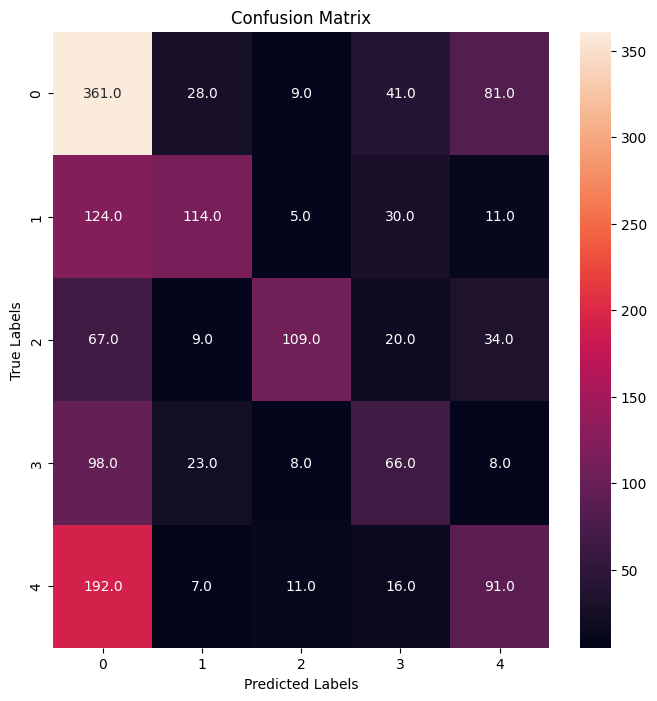

In [53]:
y_pred1 = model1.predict(X_test1)

y_pred_c = np.argmax(y_pred1, axis = 1)

y_test_c = np.argmax(y_test1, axis = 1)

confmx = confusion_matrix(y_test_c, y_pred_c)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

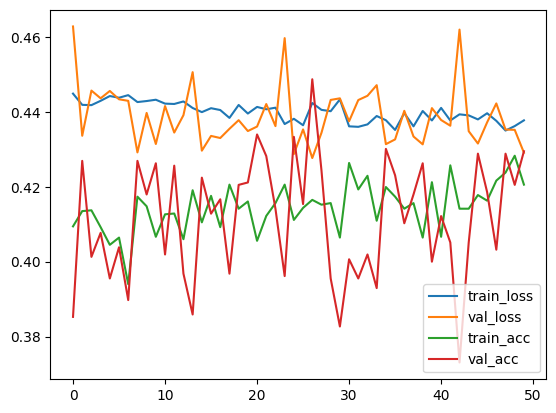

In [56]:
plt.plot(history1.history["loss"], label="train_loss")
plt.plot(history1.history["val_loss"], label="val_loss")
plt.plot(history1.history["accuracy"], label="train_acc")
plt.plot(history1.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.43      0.69      0.53       520
           1       0.63      0.40      0.49       284
           2       0.77      0.46      0.57       239
           3       0.38      0.33      0.35       203
           4       0.40      0.29      0.34       317

    accuracy                           0.47      1563
   macro avg       0.52      0.43      0.46      1563
weighted avg       0.51      0.47      0.47      1563



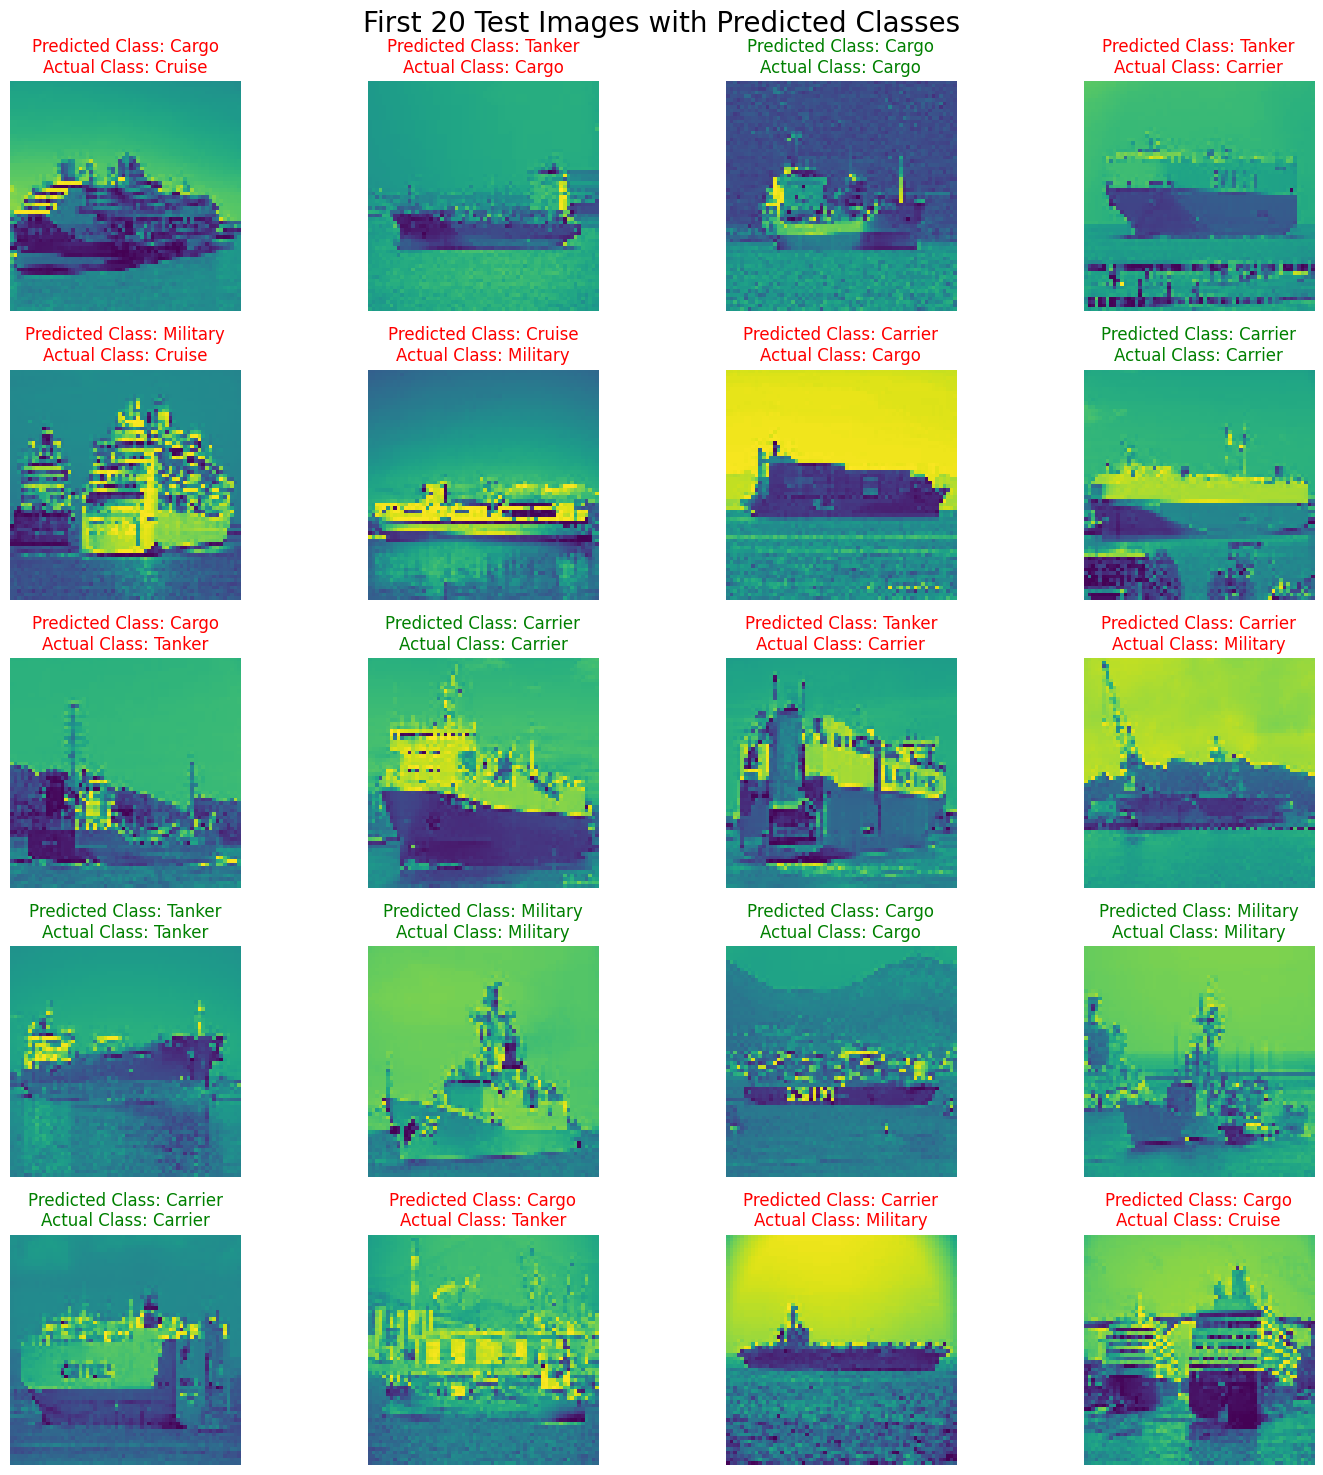

In [52]:
plt.figure(figsize=(15, 15))
plt.suptitle('First 20 Test Images with Predicted Classes', size=20)
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test1[i])
    predicted_class_label1 = ship_categories[predicted_classes1[i]]
    actual_class_label1 = ship_categories[np.argmax(y_test1[i])]

    if predicted_classes1[i] == np.argmax(y_test1[i]):
        title_color = 'green'
    else:
        title_color = 'red'

    title = f'Predicted Class: {predicted_class_label1}\nActual Class: {actual_class_label1}'
    plt.title(title, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Xception Model**

In [58]:
path = '/content/drive/MyDrive/DL Project/Game of deep learning/train/images'

img_list = list(train['image'])

data_img = []

for each in img_list:
    each_path = os.path.join(path, each)
    each_img = cv2.imread(each_path)
    each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
    each_img_resized = cv2.resize(each_img, (128,128))
    data_img.append(each_img_resized)

X2 = np.array(data_img)
print('Shape of X2: ', X2.shape)

Shape of X2:  (6252, 128, 128, 3)


In [59]:
from sklearn.preprocessing import OneHotEncoder

y2 = OneHotEncoder(dtype='int8', sparse=False).fit_transform(train['category'].values.reshape(-1,1))
print('Shape of y2: ', y2.shape)

Shape of y2:  (6252, 5)


In [60]:
X_data2, X_test2, y_data2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42)

print('X_train shape: ', X_train2.shape)
print('y_train shape: ', y_train2.shape)
print('X_val shape  : ', X_val2.shape)
print('y_val shape  : ', y_val2.shape)
print('X_test shape : ', X_test2.shape)
print('y_test shape : ', y_test2.shape)

X_train shape:  (4251, 128, 128, 3)
y_train shape:  (4251, 5)
X_val shape  :  (1063, 128, 128, 3)
y_val shape  :  (1063, 5)
X_test shape :  (938, 128, 128, 3)
y_test shape :  (938, 5)


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)

validation_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)

train_gen.fit(X_train2)
validation_gen.fit(X_val2)

In [62]:
checkpoint2 = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [63]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

batch_size = 100
epochs = 15

base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)

head = Dense(5, activation='softmax')(x)
model2 = Model(inputs=base.input, outputs=head)

model2.compile(optimizer=Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit_generator(train_gen.flow(X_train2, y_train2, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = validation_gen.flow(X_val2, y_val2, batch_size=batch_size),
                              steps_per_epoch = X_train2.shape[0] // batch_size, callbacks=[checkpoint2])

83683744/83683744 [==============================] - 0s 0us/step


Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 0.9129 - accuracy: 0.6365
Epoch 1: val_accuracy improved from -inf to 0.43650, saving model to best_model2.h5
42/42 [==============================] - 72s 942ms/step - loss: 0.9129 - accuracy: 0.6365 - val_loss: 6.1907 - val_accuracy: 0.4365
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 0.6338 - accuracy: 0.7644
Epoch 2: val_accuracy improved from 0.43650 to 0.67639, saving model to best_model2.h5
42/42 [==============================] - 32s 761ms/step - loss: 0.6338 - accuracy: 0.7644 - val_loss: 1.1705 - val_accuracy: 0.6764
Epoch 3/15
42/42 [==============================] - ETA: 0s - loss: 0.5216 - accuracy: 0.8138
Epoch 3: val_accuracy did not improve from 0.67639
42/42 [==============================] - 31s 718ms/step - loss: 0.5216 - accuracy: 0.8138 - val_loss: 1.3860 - val_accuracy: 0.6181
Epoch 4/15
42/42 [==============================] - ETA: 0s - loss: 0.4683 - accuracy: 0.8236
Epoch 

In [64]:
best_model2 = models.load_model('best_model2.h5')

In [65]:
test_loss2, best_test_acc2 = best_model2.evaluate(X_test2, y_test2, verbose=2)
print("\nBest Test Accuracy:", best_test_acc2)

30/30 - 4s - loss: 0.5817 - accuracy: 0.8539 - 4s/epoch - 141ms/step

Best Test Accuracy: 0.8539445400238037


In [66]:
best_predictions2 = best_model2.predict(X_test2)
best_predicted_classes2 = np.argmax(best_predictions2, axis=1)

30/30 [==============================] - 2s 41ms/step


In [68]:
predictions2 = best_model2.predict(X_test2)

predicted_classes2 = np.argmax(predictions2, axis=1)
print("Predicted classes:", predicted_classes2)

30/30 [==============================] - 1s 42ms/step
Predicted classes: [3 4 0 2 3 0 0 2 0 2 0 0 4 1 0 1 2 0 1 3 0 3 0 1 1 0 2 1 0 0 2 3 0 1 4 0 0
 1 4 3 4 4 4 0 3 2 1 0 0 1 3 0 4 3 3 3 1 0 1 3 0 0 0 2 1 0 3 0 4 2 3 0 0 1
 2 0 2 2 2 2 0 2 0 1 4 0 0 0 4 2 0 0 2 0 4 0 4 0 4 2 4 4 3 2 0 2 0 4 0 0 0
 1 4 4 1 4 0 1 1 2 0 2 0 4 0 4 0 2 4 0 2 4 3 0 1 0 1 3 1 0 3 0 2 2 3 1 2 0
 4 0 0 0 0 0 3 0 3 2 2 2 0 0 2 1 0 2 0 0 0 0 0 1 3 4 0 0 0 3 2 1 4 1 2 1 3
 2 3 3 2 1 0 4 4 1 2 0 1 0 0 3 0 0 0 2 0 3 4 0 3 1 1 3 0 0 1 4 1 1 4 0 0 0
 1 4 4 1 2 4 4 1 4 4 3 3 0 4 0 2 0 4 0 0 2 1 2 4 0 4 0 4 1 3 1 2 0 0 1 2 0
 0 1 0 2 1 0 4 0 4 3 1 0 0 2 0 0 4 4 1 0 1 4 0 0 4 0 4 0 0 0 0 4 0 3 2 0 1
 4 0 3 0 1 0 0 1 0 0 0 0 0 1 0 0 2 3 3 2 1 1 1 4 0 2 1 0 0 0 0 3 4 0 4 1 0
 1 4 1 0 2 2 0 0 0 0 2 0 3 1 0 4 3 2 0 1 3 0 0 0 0 0 3 0 1 0 3 0 3 1 0 1 0
 3 0 0 1 2 4 2 0 2 1 2 0 2 0 1 3 2 0 0 0 1 0 4 4 3 0 1 0 0 3 0 3 0 2 0 4 2
 4 1 2 1 1 3 2 2 4 3 4 2 3 0 1 3 3 0 1 0 3 0 4 2 3 0 4 4 0 1 0 4 0 0 3 0 3
 2 3 3 4 0 4 0 0 0 1 2 3 0 

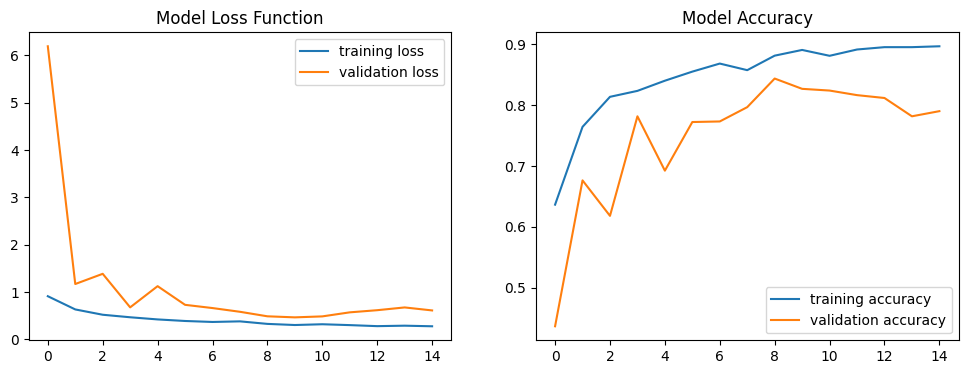

In [69]:
history_df = pd.DataFrame(history2.history)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend()

30/30 [==============================] - 2s 41ms/step


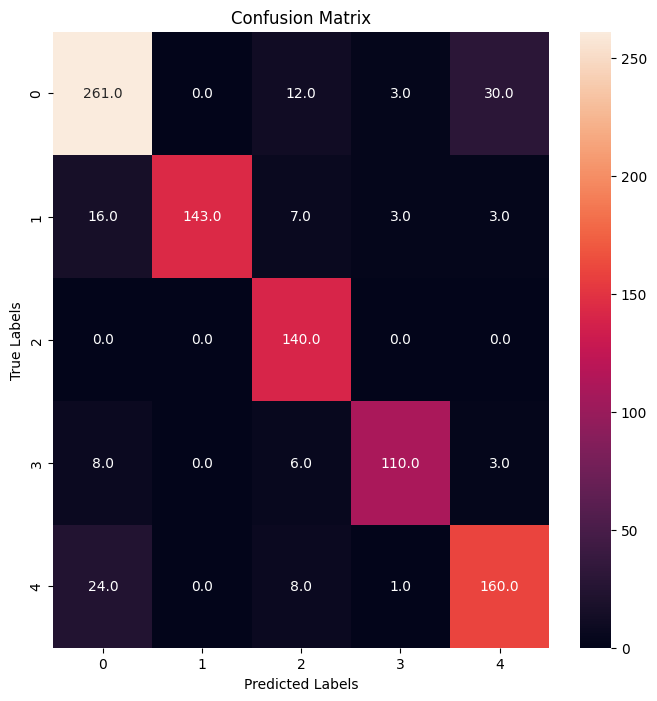

In [70]:
y_pred2 = model2.predict(X_test2)

y_pred_classes = np.argmax(y_pred2, axis = 1)

y_test_classes = np.argmax(y_test2, axis = 1)

confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       306
           1       1.00      0.83      0.91       172
           2       0.81      1.00      0.89       140
           3       0.94      0.87      0.90       127
           4       0.82      0.83      0.82       193

    accuracy                           0.87       938
   macro avg       0.88      0.88      0.88       938
weighted avg       0.87      0.87      0.87       938



30/30 [==============================] - 1s 38ms/step


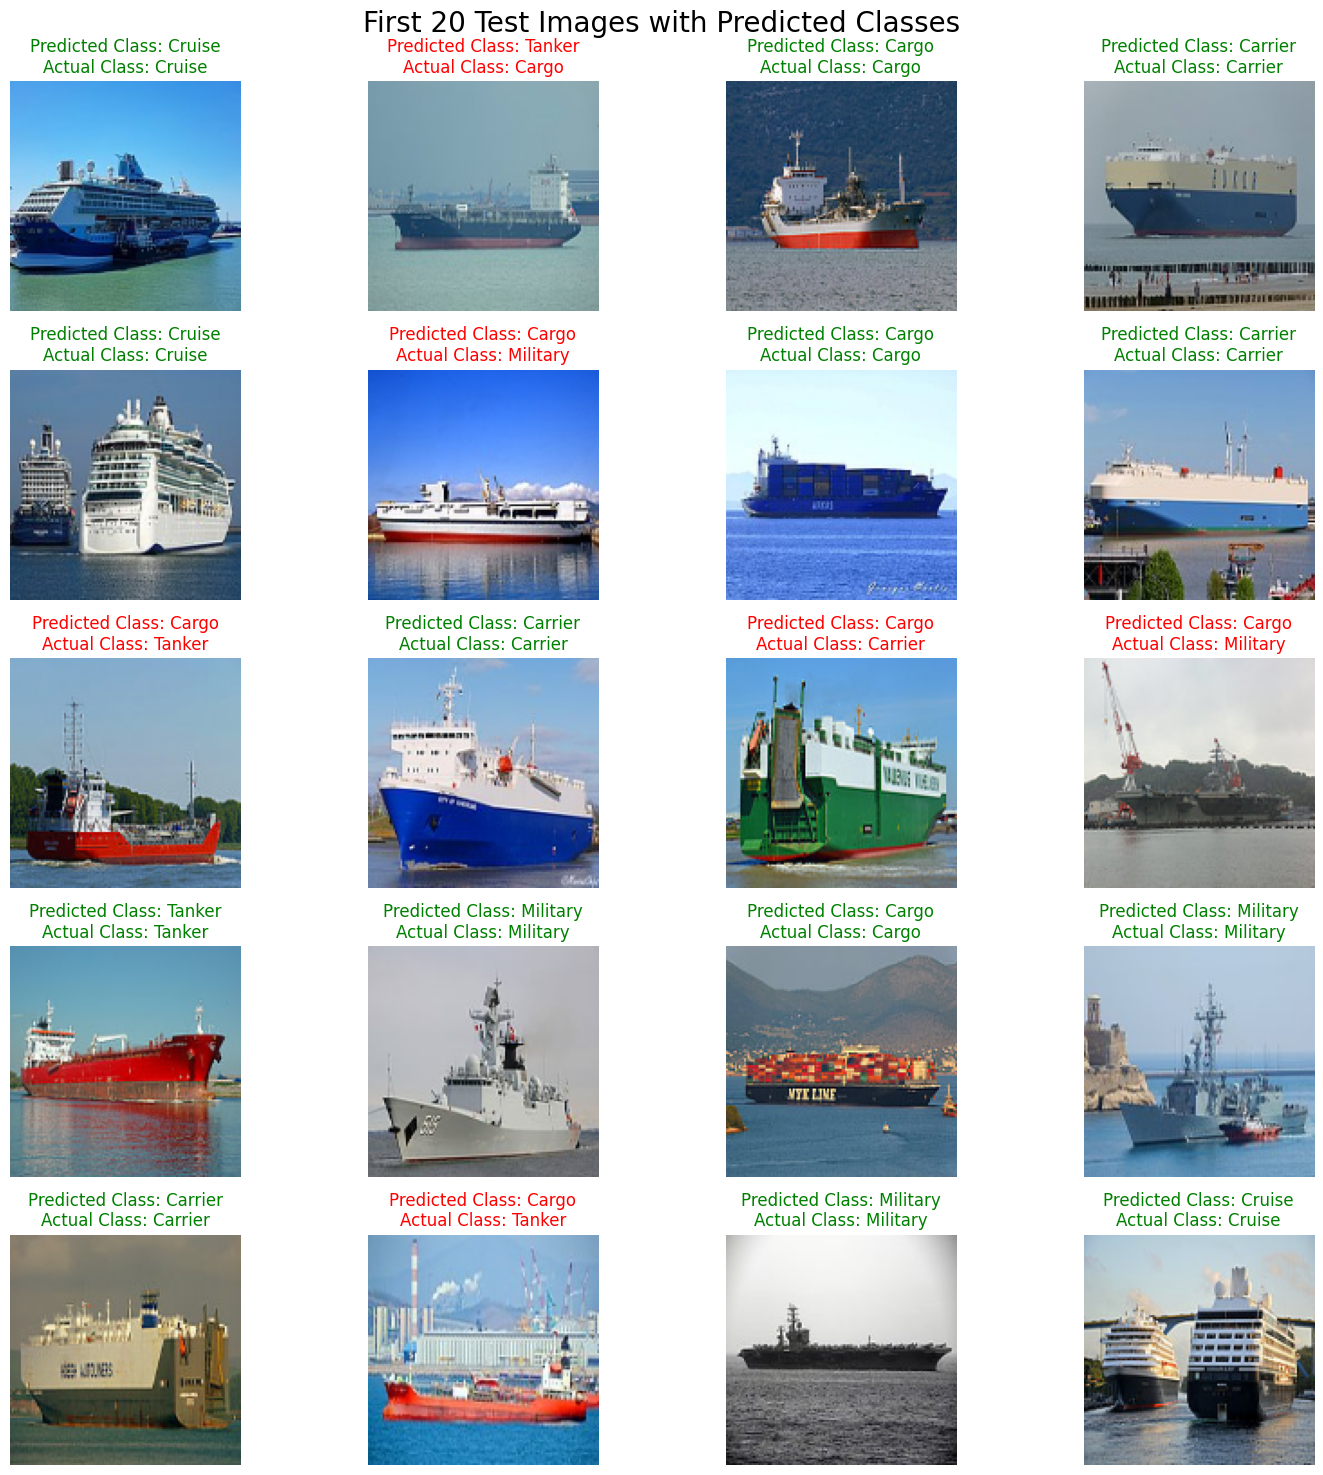

In [72]:
predicted_classes2 = np.argmax(best_model2.predict(X_test2), axis=1)

plt.figure(figsize=(15, 15))
plt.suptitle('First 20 Test Images with Predicted Classes', size=20)
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test2[i])
    predicted_class_label2 = ship_categories[predicted_classes2[i]]
    actual_class_label2 = ship_categories[np.argmax(y_test2[i])]

    if predicted_classes2[i] == np.argmax(y_test2[i]):
        title_color = 'green'
    else:
        title_color = 'red'

    title = f'Predicted Class: {predicted_class_label2}\nActual Class: {actual_class_label2}'
    plt.title(title, color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()